In [1]:
from pandas import pandas as pd
from pandas.io.json import json_normalize
from pymongo import MongoClient

In [2]:
%matplotlib inline

In [4]:
mongo_client = MongoClient('this-mongo.cc', 27016)
database_reference = mongo_client.twitter
collection_reference = database_reference.tweets

In [ ]:
sample_set = collection_reference.aggregate([{'$sample': {'size': 1000}}])
df = json_normalize(list(sample_set))
cols = ['_id', 'user.screen_name', 'user.friends_count', 'user.followers_count']
df = df[cols]
#df = df.rename(index=str, columns={"_id": "_id", "user.screen_name": "user_screen_name"})
df.head(5)

In [11]:
group_by_user = df.groupby(['user.screen_name'])
group_by_data = group_by_user.count()
#group_by_data

most_freq_tweeters = group_by_data.sort_values(by='_id', ascending=False).nlargest(5, '_id')
most_freq_tweeters

,_id,user.friends_count,user.followers_count
user.screen_name,,,
test5geo1798,2,2,2
AToTheGav,1,1,1
deeeeeemic,1,1,1
judtravis,1,1,1
johansotelo,1,1,1
j_galdamez102,1,1,1
heygurlheyelle,1,1,1
hannahxnunez,1,1,1
glennncoco19,1,1,1


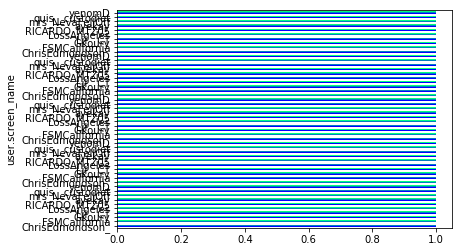

In [9]:
most_freq_tweeters.plot(kind='barh', colormap='winter', legend=False)